# EXPLORATORY DATA ANALYSIS OF HABERMANS SURVIVAL DATASET

# Dataset Description:

In [44]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load Dataset
haberman=pd.read_csv("haberman.csv")
#High Level Statistics of Dataset
t=haberman.shape
print("The number of datapoints in the datset is:",t[0])
print("The number of features in the dataset is:",t[1]-1)
t1=haberman.columns
print("The features are:{},{} and {}".format(t1[0],t1[1],t1[2]))
t=haberman["Status"].value_counts()
print("The classes are:\n",t)

The number of datapoints in the datset is: 306
The number of features in the dataset is: 3
The features are:Age_operation,Year_operation and Axillary_nodes
The classes are:
 survived 5 years or more    225
died within 5 years          81
Name: Status, dtype: int64


# Observation:

* The total number of datapoints i.e the number of rows in the dataset is 306.

* The number of features in the dataset is 3.

* The features are:
  (i) Year_operation: The year in which the person was operated.
  (ii) Age_operation: The age of the person when he/she was operated.
  (iii) Axillary_nodes: Number of positive axillary nodes detected.

* There are 2 classes in the dataset are:
    (i)survived 5years or more from the date of operation.
    (ii)died within 5years from the date of operation.

* The class "survived 5 years or more" contains 225 datapoints and the class "died within 5years" contains 81 datapoints.

* By observing the ratio of number of datapoints between both the classes, we can conclude that Habermans Survival dataset is an Imbalanced dataset. 




# Univariate Analysis:

# PDF

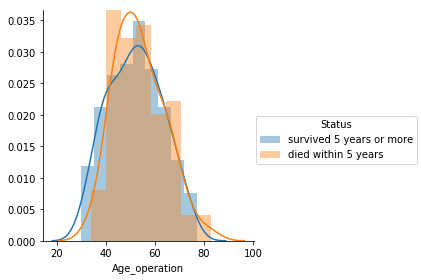

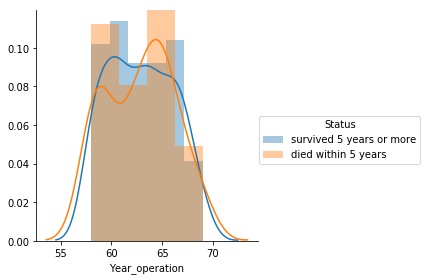

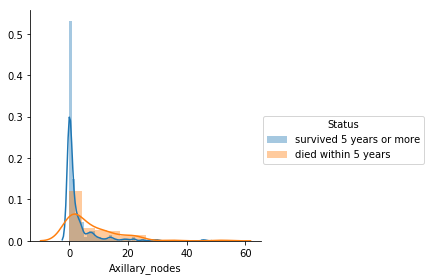

In [15]:
#PDF
sns.FacetGrid(haberman,hue="Status",size=4).map(sns.distplot,"Age_operation").add_legend()

sns.FacetGrid(haberman,hue="Status",size=4).map(sns.distplot,"Year_operation").add_legend()

sns.FacetGrid(haberman,hue="Status",size=4).map(sns.distplot,"Axillary_nodes").add_legend()
plt.show()

# Observation:

* The above 3 figures depicts the probability density function of the three features in Habermans Survival dataset.
* The PDF of both the classes are almost overlapping in the first two figures i.e for the feature Age_operation and Year_operation so we can not decide a classification rule based on the threshold of this features.
* In the third figure, the spread or deviation of the distribution of both the classes is almost same but there is a difference in the mean value of both the distribution.
* Though the PDFs both the classes are not well separated but still this gives us an intuition that the feature "Axillary_nodes" can be slightly better than the other two features in case of classification.

# PDF AND CDF

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


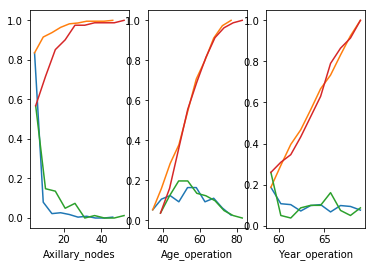

In [33]:
#CDF and PDF
#Axillary_nodes survived 
haberman_survived=haberman.loc[haberman["Status"]=="survived 5 years or more"]
counts,bin_edges=np.histogram(haberman_survived['Axillary_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.figure(1)
plt.subplot(131)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#Axillary_nodes Died
haberman_death=haberman.loc[haberman["Status"]=="died within 5 years"]
counts,bin_edges=np.histogram(haberman_death['Axillary_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
#plt.figure(1)
plt.subplot(131)
plt.xlabel("Axillary_nodes")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#Age_operation Survived
counts,bin_edges=np.histogram(haberman_survived['Age_operation'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
#plt.figure(1)
plt.subplot(132)
plt.xlabel("Age_operation")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#Age_operation Died
counts,bin_edges=np.histogram(haberman_death['Age_operation'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
#plt.figure(1)
plt.subplot(132)
plt.xlabel("Age_operation")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#Year_operation Survived
counts,bin_edges=np.histogram(haberman_survived['Year_operation'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
#plt.figure(1)
plt.subplot(133)
plt.xlabel("Year_operation")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

print("\n")

#Year_operation Died
counts,bin_edges=np.histogram(haberman_death['Year_operation'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
#plt.figure(1)
plt.subplot(133)
plt.xlabel("Year_operation")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend()
plt.show()

# Observations:

* The blue lines and orange lines are the PDF and CDF of the survived class.
* The grren lines and red lines are the PDF and CDF of died class.
* The PDF's of "Axillary_nodes","Age_operation" and "Year_operation" is almost overlapping for both the classes, so deciding a threshold value to classify will be resulting in poor accuracy of any one class or average accuracy for both the classes.
* The PDFs are not well separated and thus classifying based on threshold decided from PDF will result in poor accuracy.

# BOX PLOT

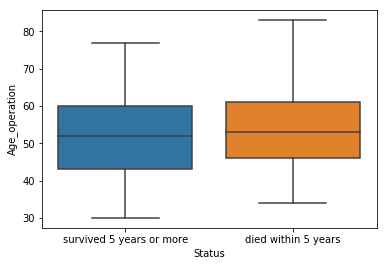

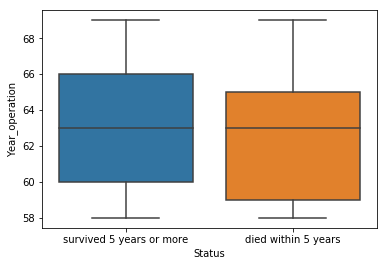

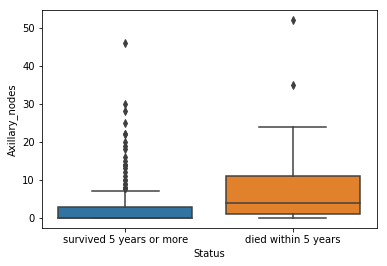

In [37]:
sns.boxplot(x='Status',y="Age_operation",data=haberman)
plt.legend()
plt.show()
plt.close()
sns.boxplot(x='Status',y="Year_operation",data=haberman)
plt.legend()
plt.show()
plt.close()
sns.boxplot(x='Status',y="Axillary_nodes",data=haberman)
plt.legend()
plt.show()

# Observation:

* From the above 3 box plots, it is clear that the feature "Axillary_node" is the best feature to define classification rule.
* The box plots of "Age_operation" and "Year_operation" is almost in the same position which clearly states that defining threshold on this features will result in poor accuracy of any one classes or average accuracy( about 50%-60%) in both the classes.
* Threshold should be based on the feature "Axillary_nodes" which will result in good accuracy(about 90%) of both the classes.

# Bivariate Analysis:

# Pair plot

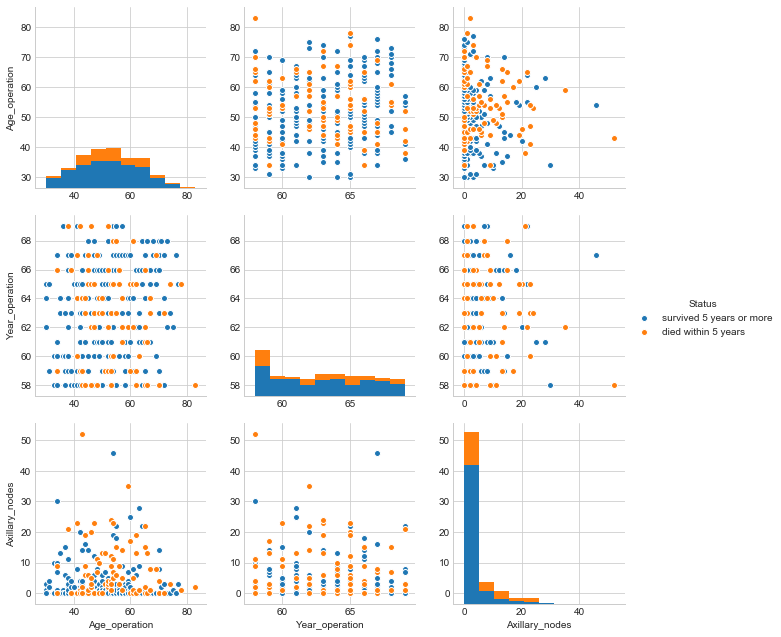

In [38]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='Status',size=3)
plt.show()

# Observation:

* It is clear from the pair plot that no combination of two variables can be useful in classifying between the two classes.

# Conclusion:

* "Axillary_nodes" is the best feature which will give maximum accuracy in classification between two classes.
* Box plot analysis is the best method of analysis in Haberman Survival dataset which will give clear view of which will be the most useful feature in classification.
* Univariate analysis(Box plot) gave better view of the features than Bivariate analysis in deciding on which feature the threshold is to be based on for classification.